### Part 1

#### Importing Libraries

In [23]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from mpl_toolkits import mplot3d
import plotly.express as px
import plotly.graph_objs as go

#### Loading and Normalising Data

In [3]:
#Reading data from file
data = pd.read_csv("glass.data")
targets = data["type"]

#Normalising data
scaler = StandardScaler()
scaled = scaler.fit_transform(data)

#### Building Classifiers

In [4]:
#Random Forest (RandomForestClassifier) Accuracy
RFClassifier = RandomForestClassifier(max_depth=2, random_state=0)
RFClassifier.fit(scaled, targets)
RFClassifiedData = RFClassifier.predict(scaled)

print("Random Forest Classifier Accuracy:",metrics.accuracy_score(targets, RFClassifiedData))

#Neural Network (MLPClassifier) Accuracy 
MLPClassifier = MLPClassifier()
MLPClassifier.fit(scaled, targets)
MLPClassifiedData = MLPClassifier.predict(scaled)

print("MLPClassifier Accuracy:",metrics.accuracy_score(targets, MLPClassifiedData))

#Support Vector Machine (SVC) Accuracy
SVC_Classifier = svm.SVC(gamma='auto')
SVC_Classifier.fit(scaled,targets)
SVC_ClassifiedData = SVC_Classifier.predict(scaled)

print("SVC Classifier Accuracy:",metrics.accuracy_score(targets, SVC_ClassifiedData))

Random Forest Classifier Accuracy: 0.8084112149532711
MLPClassifier Accuracy: 0.985981308411215
SVC Classifier Accuracy: 0.9813084112149533


#### Cross Validation

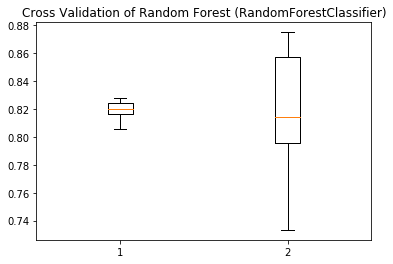

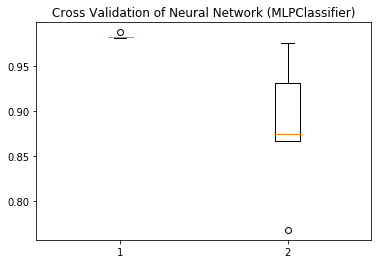

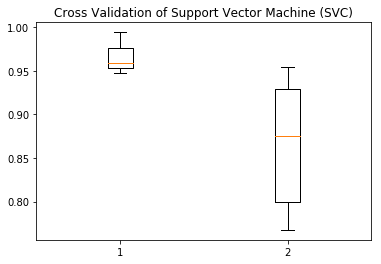

In [5]:
#Cross Validating Random Forest (RandomForestClassifier)
cv_results = cross_validate(RFClassifier, scaled, targets, cv=5, return_train_score=True)
training = cv_results["train_score"]
testing = cv_results["test_score"]
plt.title("Cross Validation of Random Forest (RandomForestClassifier)")
plt.boxplot([training, testing])
plt.show()

#Cross Validating Neural Network (MLPClassifier)
cv_results = cross_validate(MLPClassifier, scaled, targets, cv=5, return_train_score=True)
training = cv_results["train_score"] #Training Scores
testing = cv_results["test_score"] #Test Scores
plt.title("Cross Validation of Neural Network (MLPClassifier)")
plt.boxplot([training, testing])
plt.show()

#Cross Validating Support Vector Machine (SVC)
cv_results = cross_validate(SVC_Classifier, scaled, targets, cv=5, return_train_score=True)
training = cv_results["train_score"] #Training Scores
testing = cv_results["test_score"] #Test Scores
plt.title("Cross Validation of Support Vector Machine (SVC)")
plt.boxplot([training, testing])
plt.show()

#### PCA Scatter Graphs

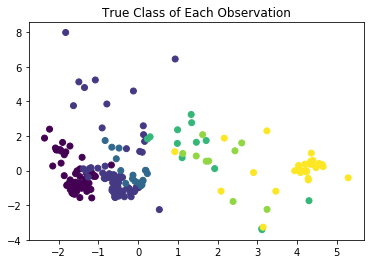

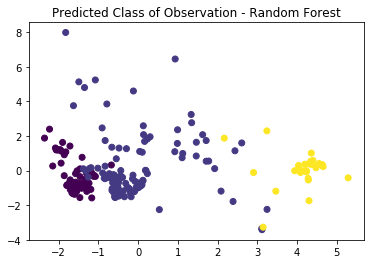

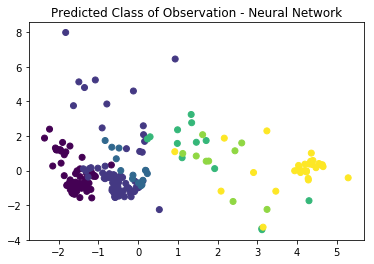

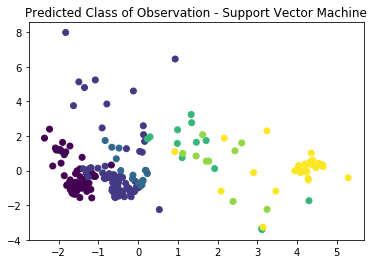

In [6]:
pca = PCA(n_components=2)
compressed = pca.fit_transform(scaled)

#True Observations
plt.figure()
plt.scatter(compressed[:,0], compressed[:,1], c=targets, cmap="viridis")
plt.title("True Class of Each Observation")
plt.show()

#Predicted Observations
#Random Forest (RandomForestClassifier)
plt.figure()
plt.scatter(compressed[:,0], compressed[:,1], c=RFClassifiedData)
plt.title("Predicted Class of Observation - Random Forest")
plt.show()

#Neural Network (MLPClassifier)
plt.figure()
plt.scatter(compressed[:,0], compressed[:,1], c=MLPClassifiedData)
plt.title("Predicted Class of Observation - Neural Network")
plt.show()

#Support Vector Machine (SVC)
plt.figure()
plt.scatter(compressed[:,0], compressed[:,1], c=SVC_ClassifiedData)
plt.title("Predicted Class of Observation - Support Vector Machine")
plt.show()

### Part 2

In [7]:
N = 500

def dtlz1(x, M=2):
    """
    An implementation of the DTLZ1 test problem. M is the number of objectives (2 by default, override for 3).
    """
    z = x[M-1:] - 0.5
    gp1 = 100 * (x[M-1:].shape[0] + np.dot(z, z) - np.cos(20 * np.pi * z).sum()) + 1
    f = np.array([gp1] * M)

    f[0] *= 0.5 * np.prod(x[0:M-1])
    for i in range(1, M-1):
        f[i] *= 0.5 * np.prod(x[0:M-i-1]) * (1 - x[M-i-1])
    f[M-1] *= 0.5 * (1 - x[0])

    return f


def dtlz2(x, M=2):
    """
    An implementation of the DTLZ2 test problem. M is the number of objectives (2 by default, override for 3).
    """
    gp1 = ((x[M-1:] - 0.5)**2).sum() + 1
    f = np.array([gp1] * M)

    for i in range(M):
        if M-i-1 > 0:
            for j in range(M-i-1):
                f[i] *= np.cos((np.pi * x[j]) / 2)

        if i > 0:
            f[i] *= np.sin((np.pi * x[M-i-1]) / 2)

    return f

#### 500 Random Solutions to DTLZ1 - 2 Objectives:

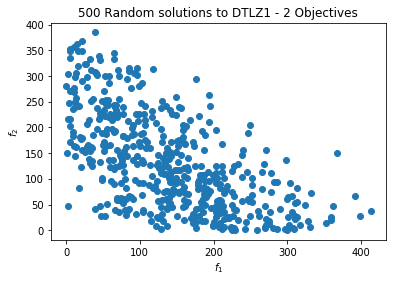

In [8]:
X = np.random.rand(N, 6)
Y = np.array([dtlz1(x) for x in X])

plt.ion()
plt.scatter(Y[:,0], Y[:,1])
plt.title("%d Random solutions to DTLZ1 - 2 Objectives" % N)
plt.xlabel("$f_1$")
plt.ylabel("$f_2$")
plt.show()

#### 500 Random Solutions to DTLZ2 - 2 Objectives:

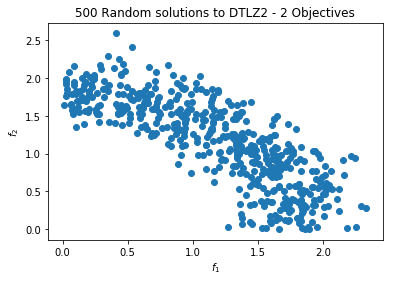

In [9]:
X = np.random.rand(N, 11)
Y = np.array([dtlz2(x) for x in X])

plt.ion()
plt.scatter(Y[:,0], Y[:,1])
plt.title("%d Random solutions to DTLZ2 - 2 Objectives" % N)
plt.xlabel("$f_1$")
plt.ylabel("$f_2$")
plt.show()

#### 500 Random Solutions to DTLZ1 - 3 Objectives:

In [10]:
X = np.random.rand(N, 7)
Y = np.array([dtlz1(x, 3) for x in X])

#Set up 3D graph for Random Solutions
fig = px.scatter_3d(Y, x=Y[:,0], y=Y[:,1], z=Y[:,2])
fig.update_layout(
    title={
        'text': "500 Random Solutions of DTLZ1 - 3 Objectives",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(scene = dict(
                    xaxis_title="f1",
                    yaxis_title="f2",
                    zaxis_title="f3"),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
fig.show()

#### 500 Random Solutions of DTLZ2 - 3 Objectives:

In [11]:
X = np.random.rand(N, 12)
Y = np.array([dtlz2(x, 3) for x in X])

#Set up 3D graph for Random Solutions
fig = px.scatter_3d(Y, x=Y[:,0], y=Y[:,1], z=Y[:,2])
fig.update_layout(
    title={
        'text': "500 Random Solutions of DTLZ2 - 3 Objectives",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(scene = dict(
                    xaxis_title="f1",
                    yaxis_title="f2",
                    zaxis_title="f3"),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
fig.show()

#### Dominance Function:

In [12]:
def dominates(u, v):
    return (u<=v).all() and (u<v).any()

#### Mutation Function:

In [34]:
def mutate(X):
    _X = X.copy()
    sigma = (np.amax(_X) - np.amin(_X)) / X.shape[1] #Calculate Sigma
    R = np.random.standard_normal(1)
    
    idx = np.random.randint(X.shape[1]) # Pick a random decision variable.

    #Mutate Randomly Selected Decision Variable
    _X[0,idx] += sigma*R
    
    if(_X[0,idx] > 1): #If Mutation is greater than 1, minus 1
        _X[0,idx] -= 1
    elif(_X[0,idx] < 0): #If Mutation is less than 0, add 1
        _X[0,idx] += 1
        
    return(_X)

#### DTLZ1 Pareto Front Algorithm:

In [14]:
def paretoDTLZ1(M, V):
    X = np.random.rand(1,V)
    Y = np.array([dtlz1(x,M) for x in X])
    
    archive = np.empty([1,M])
    archive[0] = Y[0] #Add Initial Solution to Archive
    newArchive = archive.copy()
    
    while(archive.shape[0] < (N * 2)):
        _X = mutate(X)
        _Y = np.array([dtlz1(x,M) for x in _X])
        
        if not dominates(Y[0,:], _Y[0,:]):
            #Child is Mutual or Dominates Parent
            X = _X
            Y =_Y
            
            dominated = False
            for r in range(len(archive)):
                if not dominates(archive[r,:], Y[0,:]):
                    #Child Dominates Archive Member or is Mutual
                    continue
                else:
                    #Archive Member Dominates Child
                    #Discard Child
                    dominated = True
                    break
            if not dominated:
                #Check if Child Dominates an Archive Member:
                archiveDominated = False
                for r in range(len(archive)):
                    if dominates(Y[0,:], archive[r,:]):
                        #Child Dominates an Archive Member
                        archiveDominated = True
                if archiveDominated:
                    #Remove Dominated Archive Members:
                    for r in range(len(archive)):
                        if dominates(Y[0,:], archive[r,:]):
                            newArchive = np.delete(newArchive, [r], axis=0) #Removing Dominated Solution From Archive
                    #Add Child to Archive:
                    newArchive = np.vstack((newArchive, Y)) #Adding New Solution to Archive
                else:
                    #Child Doesn't Dominate Archive Member But is Mutual
                    newArchive = np.vstack((newArchive, Y)) #Adding New Solution to Archive
                archive = newArchive
        else:
            #Parent Dominates Child
            continue    
    return archive

#### DTLZ2 Pareto Front Algorithm:

In [15]:
def paretoDTLZ2(M, V):
    X = np.random.rand(1,V)
    Y = np.array([dtlz2(x,M) for x in X])
    archive = np.empty([1,M])
    archive[0] = Y[0]
    newArchive = archive.copy()
    
    
    while(archive.shape[0] < (N * 2)):
        _X = mutate(X)
        _Y = np.array([dtlz2(x,M) for x in _X])
        
        if not dominates(Y[0,:], _Y[0,:]):
            #Child is Mutual or Dominates Parent
            X = _X
            Y =_Y
            
            dominated = False
            for r in range(len(archive)):
                if not dominates(archive[r,:], Y[0,:]):
                    #Child Dominates Archive Member or is Mutual
                    continue
                else:
                    #Archive Member Dominates Child
                    dominated = True
                    break
            if not dominated:
                #Check if Child Dominates an Archive Member:
                archiveDominated = False
                for r in range(len(archive)):
                    if dominates(Y[0,:], archive[r,:]):
                        #Child Dominates an Archive Member
                        archiveDominated = True
                if archiveDominated:
                    #Remove Dominated Archive Members:
                    for r in range(len(archive)):
                        if dominates(Y[0,:], archive[r,:]):
                            newArchive = np.delete(newArchive, [r], axis=0) #Removing Dominated Solution From Archive
                    #Add Child to Archive:
                    newArchive = np.vstack((newArchive, Y)) #Adding New Solution to Archive
                else:
                    #Child Doesn't Dominate Archive Member But is Mutual
                    newArchive = np.vstack((newArchive, Y)) #Adding New Solution to Archive
                archive = newArchive
        else:
            #Parent Dominates Child
            continue
    return archive

#### Note
For each problem:
* The first graph is the pareto front agaisnt the random solutions.
* The second graph is the pareto front on its own to make it more clearer.


#### Pareto Front of DTLZ1 - 2 Objectives:

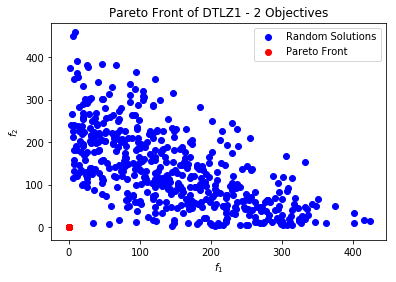

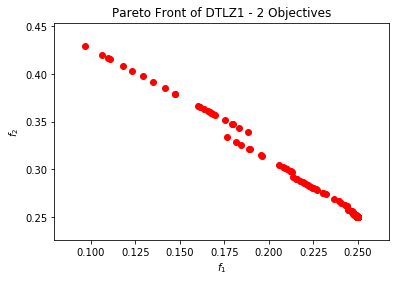

In [35]:
DTLZ1 = paretoDTLZ1(2, 6) #Get Pareto Archive

X = np.random.rand(N, 6)
DTLZ1_Random = np.array([dtlz1(x) for x in X])

#Graph With Random Solutions and Pareto Front
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(DTLZ1_Random[:,0], DTLZ1_Random[:,1], c='b', label="Random Solutions")
ax1.scatter(DTLZ1[:,0], DTLZ1[:,1], c='r', label="Pareto Front")
plt.legend(loc="upper right")
plt.title("Pareto Front of DTLZ1 - 2 Objectives")
plt.xlabel("$f_1$")
plt.ylabel("$f_2$")
plt.show()

#Graph With Pareto Front
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(DTLZ1[:,0], DTLZ1[:,1], c='r')
plt.title("Pareto Front of DTLZ1 - 2 Objectives")
plt.xlabel("$f_1$")
plt.ylabel("$f_2$")
plt.show()



#### Pareto Front of DTLZ2 - 2 Objectives:

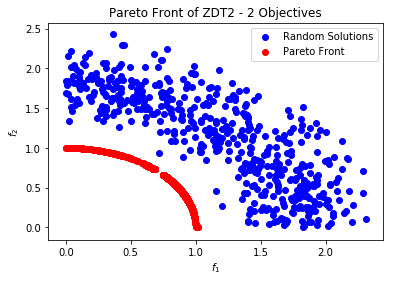

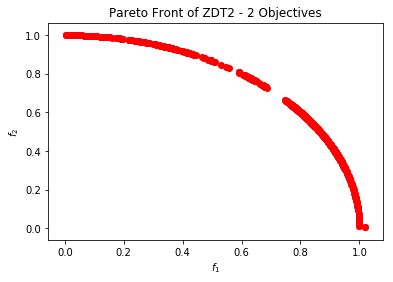

In [36]:
DTLZ2 = paretoDTLZ2(2, 11) #Get Pareto Archive

X = np.random.rand(N, 11)
DTLZ2_Random = np.array([dtlz2(x) for x in X])

#Graph With Random Solutions and Pareto Front
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(DTLZ2_Random[:,0], DTLZ2_Random[:,1], c='b', label="Random Solutions")
ax1.scatter(DTLZ2[:,0], DTLZ2[:,1], c='r', label="Pareto Front")
plt.legend(loc="upper right")
plt.title("Pareto Front of ZDT2 - 2 Objectives")
plt.xlabel("$f_1$")
plt.ylabel("$f_2$")
plt.show()

#Graph With Pareto Front
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(DTLZ2[:,0], DTLZ2[:,1], c='r')
plt.title("Pareto Front of ZDT2 - 2 Objectives")
plt.xlabel("$f_1$")
plt.ylabel("$f_2$")
plt.show()

#### Pareto Front of DTLZ1 - 3 Objectives:

In [37]:
DTLZ1 = paretoDTLZ1(3, 7)

X = np.random.rand(N, 7)
DTLZ1_Random = np.array([dtlz1(x, 3) for x in X])

#Data to Plot
Random_Solutions = go.Scatter3d(
    x = DTLZ1_Random[:,0],
    y = DTLZ1_Random[:,1],
    z = DTLZ1_Random[:,2],
    mode ='markers',
    name = 'Random Solutions',
    marker =dict(
      color = 'blue',
      size = 8,
      opacity = 0.9
    )
)

Pareto_Front  = go.Scatter3d(
    x= DTLZ1[:,0],
    y= DTLZ1[:,1],
    z= DTLZ1[:,2],
    mode='markers',
    name = 'Pareto Front',
    marker=dict(
        color='red',
        size=8,
        symbol='circle',
        opacity=0.9
    )
)

data = [Random_Solutions , Pareto_Front]
#Graph With Random Solutions and Pareto Front
fig = go.Figure(data=data)
fig.update_layout(
    title={
        'text': "Pareto Front of DTLZ1 - 3 Objectives",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(scene = dict(
                    xaxis_title="ƒ1",
                    yaxis_title="ƒ2",
                    zaxis_title="ƒ3"),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
fig.show()

data = [Pareto_Front]
#Graph With Pareto Front
fig = go.Figure(data=data)
fig.update_layout(
    title={
        'text': "Pareto Front of DTLZ1 - 3 Objectives",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(scene = dict(
                    xaxis_title="ƒ1",
                    yaxis_title="ƒ2",
                    zaxis_title="ƒ3"),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
fig.show()

#### Pareto Front of DTLZ2 - 3 Objectives:

In [40]:
DTLZ2 = paretoDTLZ2(3, 12) #Get Pareto Archive

X = np.random.rand(N, 12)
DTLZ2_Random = np.array([dtlz2(x, 3) for x in X])

#Data to Plot
Random_Solutions = go.Scatter3d(
    x = DTLZ2_Random[:,0],
    y = DTLZ2_Random[:,1],
    z = DTLZ2_Random[:,2],
    mode ='markers',
    name = 'Random Solutions',
    marker =dict(
      color = 'blue',
      size = 8,
      opacity = 0.9
    )
)

Pareto_Front  = go.Scatter3d(
    x= DTLZ2[:,0],
    y= DTLZ2[:,1],
    z= DTLZ2[:,2],
    mode='markers',
    name = 'Pareto Front',
    marker=dict(
        color='red',
        size=8,
        symbol='circle',
        opacity=0.9
    )
)

data = [Random_Solutions , Pareto_Front]
#Graph With Random Solutions and Pareto Front
fig = go.Figure(data=data)
fig.update_layout(
    title={
        'text': "Pareto Front of DTLZ2 - 3 Objectives",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(scene = dict(
                    xaxis_title="ƒ1",
                    yaxis_title="ƒ2",
                    zaxis_title="ƒ3"),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
fig.show()


data = [Pareto_Front]
#Graph With Pareto Front
fig = go.Figure(data=data)
fig.update_layout(
    title={
        'text': "Pareto Front of DTLZ2 - 3 Objectives",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(scene = dict(
                    xaxis_title="ƒ1",
                    yaxis_title="ƒ2",
                    zaxis_title="ƒ3"),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
fig.show()